### 네이버 기사 카테고리 분류

##### 1. Import Packages

In [1]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

##### 2. Load Dataset
- Category
    - 0 - 정치
    - 1 - 경제
    - 2 - 사회
    - 3 - 생활/문화
    - 4 - 세계
    - 5 - IT/과학

In [2]:
article_df = pd.read_csv("article.csv")
print(len(article_df))
article_df.tail(2)

600


title  \
598  서왈보·안창남보다 먼저…101년전 하늘 난 한국인 있었다   
599         ‘암흑물질’ 잡으려 1100m 땅속 파고든다   

                                                  link  category  article  \
598  https://news.naver.com/main/read.nhn?mode=LSD&...       105      NaN   
599  https://news.naver.com/main/read.nhn?mode=LSD&...       105      NaN   

                                               content  
598  [박상준의 과거창]7살때 하와이로 이민간 이응호1차대전때 미 육군 조종사 출격안창남...  
599  우주 27%나 차지하는 암흑물질30여년 매달렸지만 아직 못찾아IBS, 정선 폐광에 ...

##### 3. Split Tratin, Test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(article_df.content, article_df.category, test_size=0.1, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(540, 60, 540, 60)

##### 4. Make Model

In [4]:
clf = Pipeline([
    ('vect', TfidfVectorizer()), 
    ('clf', MultinomialNB(alpha=0.01)),
])

In [5]:
%%time
model = clf.fit(X_train.values.astype("str"), y_train)

CPU times: user 515 ms, sys: 23.8 ms, total: 539 ms
Wall time: 325 ms


##### 5. Confusion Matrix, Classfication Report

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

In [7]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  1,  0],
       [ 0,  0,  9,  0,  0,  1],
       [ 0,  1,  0,  6,  0,  0],
       [ 2,  0,  0,  1, 13,  0],
       [ 0,  3,  0,  2,  0,  4]])

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         100       0.77      1.00      0.87        10
         101       0.60      0.75      0.67         8
         102       1.00      0.90      0.95        10
         103       0.67      0.86      0.75         7
         104       0.93      0.81      0.87        16
         105       0.80      0.44      0.57         9

   micro avg       0.80      0.80      0.80        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.82      0.80      0.80        60



##### 6. Prediction

In [9]:
X_test = X_test.reset_index(drop=True)

In [10]:
X_test[0][:100], X_test[1][:100], X_test[2][:100]

('중국이 영유권 주장하는 남중국해 난사군도 근접 항해무역협상 앞둔 미일 줄다리기 팽팽（ＰＧ）    (서울=연합뉴스) 이세원 기자 = 도널드 트럼프 미국 대통령이 중국에 관세를 추가로',
 '왕실-군부 공생관계 변화 가능성 주목지난 4일 대관식을 통해 태국 국왕에 공식 등극한 마하 와찌랄롱꼰 왕이 6일 오후 방콕 왕궁 발코니에서 손을 들어 국민들에게 인사하고 있다. 옆',
 '충북·대전 규제샌드박스 선정 제외신청서에 내용 정확히 명시 안해오송 단지 등 입주기업들 한숨만[서울경제] 충북과 대전이 바이오 관련 규제자유특구 지정에서 탈락하면서 오송바이오산업단')

In [11]:
result = model.predict([ X_test[0], X_test[1], X_test[2] ])
result

array([104, 104, 101])

In [12]:
classification_dict = {
    100:"정치",
    101:"경제",
    102:"사회",
    103:"생활/문화",
    104:"세계",
    105:"IT/과학",
}
for idx, category in enumerate(result):
    print(classification_dict[category], "-",X_test[idx][:100])

세계 - 중국이 영유권 주장하는 남중국해 난사군도 근접 항해무역협상 앞둔 미일 줄다리기 팽팽（ＰＧ）    (서울=연합뉴스) 이세원 기자 = 도널드 트럼프 미국 대통령이 중국에 관세를 추가로
세계 - 왕실-군부 공생관계 변화 가능성 주목지난 4일 대관식을 통해 태국 국왕에 공식 등극한 마하 와찌랄롱꼰 왕이 6일 오후 방콕 왕궁 발코니에서 손을 들어 국민들에게 인사하고 있다. 옆
경제 - 충북·대전 규제샌드박스 선정 제외신청서에 내용 정확히 명시 안해오송 단지 등 입주기업들 한숨만[서울경제] 충북과 대전이 바이오 관련 규제자유특구 지정에서 탈락하면서 오송바이오산업단


##### 7. Save & Load Model

In [13]:
pickle.dump(model, open("classification.plk", "wb"))

In [14]:
load_model = pickle.load(open("classification.plk", "rb"))

In [15]:
test_str1 = "네이버와 카카오 드론 기술 발전에 주력"
test_str2 = "요즘에 환율과 주가가 예측 불허"
print( classification_dict[ load_model.predict([test_str1])[0] ], "-", test_str1 )
print( classification_dict[ load_model.predict([test_str2])[0] ], "-", test_str2 )

IT/과학 - 네이버와 카카오 드론 기술 발전에 주력
경제 - 요즘에 환율과 주가가 예측 불허


In [16]:
# 카테고리별 확률 데이터로 출력
proba = load_model.predict_proba([test_str2])[0]
proba

array([0.06139095, 0.70712709, 0.01567353, 0.01384638, 0.0857024 ,
       0.11625964])

In [17]:
category = classification_dict.values()
np.array(list(category))

array(['정치', '경제', '사회', '생활/문화', '세계', 'IT/과학'], dtype='<U5')

In [18]:
df = pd.DataFrame({
    "category": np.array(list(category)),
    "proba": proba,
})

df

category     proba
0       정치  0.061391
1       경제  0.707127
2       사회  0.015674
3    생활/문화  0.013846
4       세계  0.085702
5    IT/과학  0.116260

In [19]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

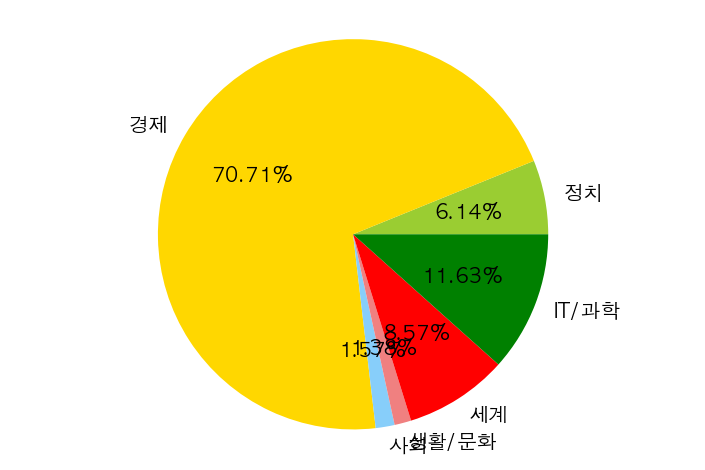

In [21]:
mpl.rc('font', family="AppleGothic")
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'green']
plt.pie(df["proba"], labels=df["category"], colors=colors, autopct='%1.2f%%')
plt.axis('equal')
plt.show()